In [1]:
from knowknow import *

In [2]:
db = Dataset('sociology-wos-74b')
dball = Dataset('sociology-wos-all')

loading variable sociology-wos-74b/groups from disk
loading variable sociology-wos-74b/group_reps from disk
loading variable sociology-wos-74b/_attributes from disk
loading variable sociology-wos-all/groups from disk
loading variable sociology-wos-all/_attributes from disk


In [3]:
db2 = Dataset('sociology-wos-74a')

loading variable sociology-wos-74a/groups from disk
loading variable sociology-wos-74a/group_reps from disk
loading variable sociology-wos-74a/_attributes from disk


In [4]:
db2(c='Portes, A.|1998|annu rev sociol,v22,p1').cits

loading variable sociology-wos-74a/ind ___ c from disk


0

In [5]:
db.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
db2.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
dball.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)

# more uncategorized analysis

In [6]:
cc_full = db2.by('c').docs

loading variable sociology-wos-74a/doc ___ c from disk


In [7]:
cc = db.by('c').cits

loading variable sociology-wos-74b/ind ___ c from disk


In [8]:
num1 = sum([1 for x,c in cc_full.items() if c == 1])
num2 = sum([1 for x,c in cc_full.items() if c in [2,3,4]])
num3 = sum([1 for x,c in cc_full.items() if c >= 5])

total = sum([1 for x,c in cc_full.items() if c >= 1])
total2 = sum(db2.by('fy').docs.values())
total3 = len(db2.items('fj'))

c1 = num1/total
c2 = num2/total
c3 = num3/total

loading variable sociology-wos-74a/doc ___ fy from disk
loading variable sociology-wos-74a/ind ___ fj from disk


In [9]:
c4 = sum([c for x,c in cc_full.items() if c >= 5]) / sum(cc_full.values())

In [10]:
num5 = sum([1 for x,c in cc.items() if c > 1])

In [11]:
sum( db2.by('fj').cits.values() )

3747909

In [12]:
min(cc.values())

5

In [13]:
sum( db.by('fj').cits.values() )

loading variable sociology-wos-74b/ind ___ fj from disk


1502423

In [14]:
display(Markdown("""
Within the 73 sociology journals identified above, 
    Web of Science has bibliographic data on 93,648 articles published between 1900 and 2020, 
    3,747,909 citations total. 
Of the {total:,} distinct cited works cited in these articles, 
    {c1:.0%} received only a single citation, 
    {c2:.0%} received between 2 and 4 citations, 
    and {c3:.0%} received at least 5 citations. 
However, {c4:.0%} of citations are to the 7% of cited works which receive at least 5 citations. 
Typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work, 
    so this number of once-cited works is an overestimate. 
But if it is even remotely accurate, 
    it shows that the relatively uncited get about as much attention as the relatively cited. 
In the rest of this paper I focus only on cited works that received at least 5 citations total, 
    disregarding the totally ignored. 
""".format(**locals())))


Within the 73 sociology journals identified above, 
    Web of Science has bibliographic data on 93,648 articles published between 1900 and 2020, 
    3,747,909 citations total. 
Of the 1,699,615 distinct cited works cited in these articles, 
    75% received only a single citation, 
    18% received between 2 and 4 citations, 
    and 7% received at least 5 citations. 
However, 45% of citations are to the 7% of cited works which receive at least 5 citations. 
Typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work, 
    so this number of once-cited works is an overestimate. 
But if it is even remotely accurate, 
    it shows that the relatively uncited get about as much attention as the relatively cited. 
In the rest of this paper I focus only on cited works that received at least 5 citations total, 
    disregarding the totally ignored. 


In [15]:
#display(Markdown("""
"""
Of the {total:,} distinct cited works cited in {total2:,} Sociology articles in the chosen {total3:,} sociology journals,
    {c1:.0%} ({num1:,}) received only a single citation,
    {c2:.0%} ({num2:,}) received between 2 and 4 citations,
    and {c3:.0%} ({num3:,}) received at least 5 citations.
{c4:.0%} of the citations are to the {c3:.0%} which receive at least 5 citations.
This is an underestimate, as typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work.
But if it's even remotely accurate, it shows that the relatively *uncited* get about as much attention as the relatively *cited*.
In this section I focus on the *cited* (discarding any works with less than 5 citations total).
This discards errors and one-offs.
Typographical errors and nonstandard spellings are excluded unless these become relatively common in this context.
And we consider only the references which have any substantive life to speak of.
The following analysis is on the {num5:,} remaining cited works.
""";
#""".format(**locals())))

loading variable sociology-wos-74b/ind ___ fy from disk


c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


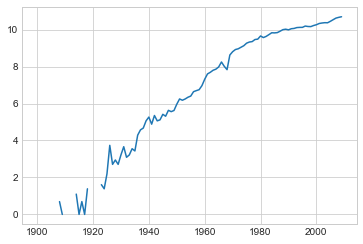

In [16]:
c = db.by('fy').cits
yrs = range(1900,2010,1)
plt.plot(yrs, np.log([c[(y,)] for y in yrs]));

loading variable sociology-wos-all/ind ___ fy from disk


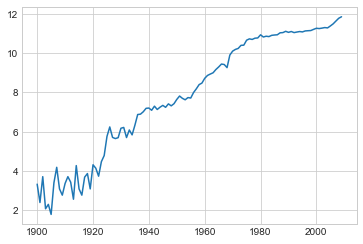

In [17]:
c = dball.by('fy').cits
yrs = range(1900,2010,1)
plt.plot(yrs, np.log([c[(y,)] for y in yrs]));

# summary before filtering

In [18]:
c1 = sum( dball.by('fy').docs.values() )
c2 = len( list(dball.by('fj').docs) )
c3 = len( list(db.by('fj').docs) )

Nclim = sum( c for (j,),c in dball.by('fj').cits.items() if j in set(db.items('fj')) )
Ndlim = sum( c for (j,),c in dball.by('fj').docs.items() if j in set(db.items('fj')) )

loading variable sociology-wos-all/doc ___ fy from disk
loading variable sociology-wos-all/doc ___ fj from disk
loading variable sociology-wos-74b/doc ___ fj from disk
loading variable sociology-wos-all/ind ___ fj from disk


In [19]:
min_y = min( db.items('fy') )
max_y = max( db.items('fy') )

AttributeError: 'tuple' object has no attribute 'fy'

In [ ]:
citN = sum( db.by('fj').cits.values() )
citN_m = citN / 1e6
docN = sum( db.by('fj').docs.values() )

njournals = len(db.items('fj'))

wauthAve = sum( db.by('fa').docs.values() ) / docN
cauthAve = sum( db.by('ta').docs.values() ) / docN
cworkAve = sum( db.by('c').docs.values() ) / docN

In [ ]:
cN = len(db.items('c'))
faN = len(db.items('fa'))
ffaN = len(db.items('ffa'))
taN = len(db.items('ta'))

Web of Science provides a shortened version of each cited work, which attempts to generalize over reference formats, including references made in the body of the article or in footnotes, 
    as most were before broad citation format standardization in the late 1960s and early 1970s.
Their method of shortening has changed over time, and smudges of ink or typographical errors made by authors result in inconsistencies.
I use a grouping algorithm to identify identical references and combine them. See Appendix for details.

In [ ]:
display(Markdown("""
As of April 2020, there were {c1:,} journal articles indexed by Web of Science in the category "Sociology," distributed across {c2:,} journals.
I limit my focus here to the journals which consistently publish sociology articles with references Web of Science is able to extract.
I also exclude journals which were founded after 1995 or which end before 2015.
This leaves {c3:,} journals, containing {Ndlim:,} articles published between {min_y} and {max_y}, and {Nclim:,} total citations.
""".format(**locals())))

In [ ]:
display(Markdown("""
After filtering journals with incomplete or limited data, 
    grouping cited reference strings by their textual similarity, 
    and ignoring cited works which receive less than five citations total, 
    I was left with {docN:,} journal articles and {citN_m:0.1f}M citations. 
Across all articles, 
    there are on average {wauthAve:0.2f} writing authors, 
        {cauthAve:0.2f} cited authors, 
        and {cworkAve:0.2f} cited works. 
In total there were 
    {cN:,} cited works, 
    {taN:,} cited authors, and 
    {faN:,} writing authors 
    ({ffaN:,} first authors). 
""".format(**locals())))

In [ ]:
np.sum(list(db.by('fy').docs.values()))

In [ ]:
c = db.by('fj').cits
d = db.by('fj').docs
print( max(db.items('fj'), key=lambda x:c[(x,)]/d[(x,)]) )
print( min(db.items('fj'), key=lambda x:c[(x,)]/d[(x,)]) )

In [ ]:
st_ave = db(fj='sociological theory').cits / db(fj='sociological theory').docs
soc_ave = db(fj='society').cits / db(fj='society').docs

In [ ]:
top5 = sorted( db.items('fj'), key=lambda x: -db(fj=x).cits )[:5]

In [ ]:
top5str = ["*{}* ({})".format(x.title(), db(fj=x).cits) for x in top5]
top5str = ", ".join(top5str[:-1]) + ", and " + top5str[-1]
top5prop = sum( db(fj=x).cits for x in top5 ) / sum( db(fj=x).cits for x in db.items('fj') )
top5propd = sum( db(fj=x).docs for x in top5 ) / sum( db(fj=x).docs for x in db.items('fj') )

In [ ]:
display(Markdown("""
Sociological Theory produces the most citations per article, at {st_ave:0.1f}. 
Meanwhile Society produces just {soc_ave:0.1f} citations per article. 
Society’s format does not beg for citations at all, 
    while papers published in Sociological Theory are often an extended “theoretical motivation” section.
Web of Science provides the most citations for the journals {top5str}. 
Together these five journals comprise {top5prop:0.0%} of all citations ({top5propd:0.0%} of documents) in this dataset.
""".format(**locals())))

In [ ]:
d50 = sum( db(fy=YY).docs for YY in range(1950,1960) )
c50 = sum( db(fy=YY).cits for YY in range(1950,1960) )
cd50 = c50/d50
j50 = len(set( fj for (fj,fy),c in db.by('fj','fy').cits.items() if c > 0 and fy in range(1950,1960) ))


d00 = sum( db(fy=YY).docs for YY in range(2000,2010) )
c00 = sum( db(fy=YY).cits for YY in range(2000,2010) )
cd00 = c00/d00
j00 = len(set( fj for (fj,fy),c in db.by('fj','fy').cits.items() if c > 0 and fy in range(2000,2010) ))

d2019 = db(fy=2019).docs

In [ ]:
display(Markdown("""
Only {d50:,} articles were published in {j50:,} journals from 1950-1959 ({cd50:0.1f} citations per article),
    compared to {d00:,} articles in {j00:,} journals from 2000-2009 ({cd00:0.1f} citations per article).
In 2019 alone there were {d2019:,} articles published.
""".format(**locals())))

# citing authors

In [ ]:
fc = db.by('fa').docs

num1 = len(db.items('fa'))
num2 = len([_ for (a,),c in fc.items() if c == 1])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:10]
def transa(x):
    (x,),c = x
    x = x.split(", ")
    return (x[1]+". "+x[0]).title() + " (%s)"%c
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

In [ ]:
len([y for y in fc.values() if y>20])

In [ ]:
num3 = len([_ for (a,),c in fc.items() if c >20])
num4 = len([_ for (a,),c in fc.items() if c >40])

In [ ]:
display(Markdown("""
Of the {num1:,} authors who published in this context, {num2:,} only published a single time ({p2:0.0%}).
{num3:,} authors have published more than 20 papers, and just {num4:,} published more than 40.
The top ten publishing first authors are {an}.
It is no accident that "Smith" shows up regularly in this list, a reminder that author names are not disambiguated.
""".format(**locals())))

In [ ]:
plt.hist(fc.values())

# cited authors

In [ ]:
fc = db.by('ta').docs

num1 = len(db.items('ta'))
num2 = len([_ for (a,),c in fc.items() if c == 5])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:20]
def transa(x):
    (x,),c = x
    x = x.split(", ")
    return (x[1]+" "+x[0]).title() + " (%s citations)"%c
    #return (x[1]+" "+x[0]).title() + " ({:,} citations)".format(c)
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

In [ ]:
num3 = len([_ for (a,),c in fc.items() if c >100])
p3 = num3/num1
num4 = len([_ for (a,),c in fc.items() if c >1000])
p4 = num4/num1

In [ ]:
display(Markdown("""
I have already filtered cited works with less than five citations, so all {num1:,} cited authors in this dataset have at least five citations.
Of these, {num2:,} ({p2:0.0%}) were cited less than 10 times, {num3:,} ({p3:0.0%}) were cited at least 100 times and {num4} were cited at least 1000 times in this dataset.
The top authors cited in this dataset were {an}.
""".format(**locals())))

# cited works

In [ ]:
fc = db.by('c').docs

num1 = len(db.items('c'))
num2 = len([_ for (a,),c in fc.items() if c == 5])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:10]
def transa(x):
    (x,),c = x
    x = x.split("|")
    if len(x)==2:
        a,w = x
        #return ("%s (??)"%a).title() + " (%s citations)"%c
    elif len(x)==3:
        a,y,w = x
        #return ("%s (%s)"%(a,y)).title() + " (%s citations)"%c
    print (a, "-", w)
    a = a.split(",")[0]
    a = a.title()
    a = a+"'s"
    
    w = w.title()
    return ("%s %s (%s)"%(a,w,c))
    #return (x[1]+" "+x[0]).title() + " ({:,} citations)".format(c)
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

In [ ]:
num3 = len([_ for (a,),c in fc.items() if c >100])
p3 = num3/num1
num4 = len([_ for (a,),c in fc.items() if c >1000])
p4 = num4/num1

In [ ]:
display(Markdown("""
All {num1:,} cited works in this dataset have at least five citations.
Of these, {num2:,} ({p2:0.0%}) were cited less than 10 times, {num3:,} ({p3:0.0%}) were cited at least 100 times and {num4} were cited at least 1000 times in this dataset.
The top cited works in this dataset were {an}.
""".format(**locals())))